In [78]:
import numpy as np
import matplotlib.pyplot as plt
import random as r
%matplotlib inline


w12, w13, w15, w24, w34, w35 = 0.1, 0.8, 0.1, 0.8, 0.1, 0.1
K = 1000
N = 30
W = np.array([[1-w12-w13-w15, w12, w13, 0, w15], 
              [w12, 1-w12-w24, 0, w24, 0], 
             [w13, 0, 0, w34, w35], 
              [0, w24, w34, 1-w24-w34, 0], 
             [w15, 0, w35, 0, 1-w15-w35]])
W1 = np.array([[1-w12-w13-w15, w12, w13, 0, w15], 
               [w12, 1-w12-w24, 0, w24, 0], 
             [w13, 0, 0, w34, w35], 
               [0, w24, w34, 1-w24-w34, 0], 
             [0, 0, 0, 0, 1]])
Q0 = np.array([1, 5, 2, 8, 8])
#W = np.array([[0, 1, 0], [0, 0, 1], [1/2, 1/2, 0]])
#W1 = np.array([[0, 1, 0], [0, 0, 1], [0, 0, 1]])
#Q0 = np.array([1, 2, 6])

In [10]:
#Возвращает массив траекторий для каждого узла
def Traj(W, W1, Q0, N, a, b):
    n = len(W)
    Y = np.zeros((N, n)); A = Q0; Y[0] = A
    counter = 0; flag = 1
    TmFix = b + 1; TmWork = r.randint(1, a)
    for i in range(1, N):
        if(flag == 0):
            A = np.dot(W, A)
            Y[i] = A
            counter += 1
        if(flag == 1):
            A = np.dot(W1, A)
            Y[i] = A
            counter += 1
        if(counter >= TmWork and flag == 0):
            flag = 1; counter = 0
            TmFix = r.randint(1, b)
        if(counter >= TmFix and flag == 1):
            flag = 0; counter = 0
            TmWork = r.randint(1, a)
    return Y

In [76]:
def AverTraj(W, W1, Q0, K, N, a, b):
    n = len(W)
    G = np.zeros((N, n))
    for k in range(K):
        A = np.copy(Q0); G[0] += A
        counter = 0; flag = 0
        TmWork = r.randint(1, a); TmFix = b + 1
        for i in range(1, N):
            if(flag == 0):
                A = np.dot(W, A)
                G[i] += A
                counter += 1
            if(flag == 1):
                A = np.dot(W1, A)
                G[i] += A
                counter += 1
            if(counter >= TmWork and flag == 0):
                flag = 1; counter = 0
                TmFix = r.randint(1, b)
            if(counter >= TmFix and flag == 1):
                flag = 0; counter = 0
                TmWork = r.randint(1, a)
    G /= K
    return G

In [12]:
#Выдает траекторию в детерминированном случае
def DetTraj(W, Q0, N):
    n = len(W)
    Y = np.zeros((N, n))
    A = Q0
    Y[0] = A
    for i in range(1, N):
        A = np.dot(W, A)
        Y[i] = A   
    return Y

#Выдает оценочное консенсусное значение для параметров a и b
def NumTraj(W, W1, Q0, K, N, a, b):
    res = AverTraj(W, W1, Q0, K, N, a, b)[N-1]
    res = sum(res)/len(res)
    return res

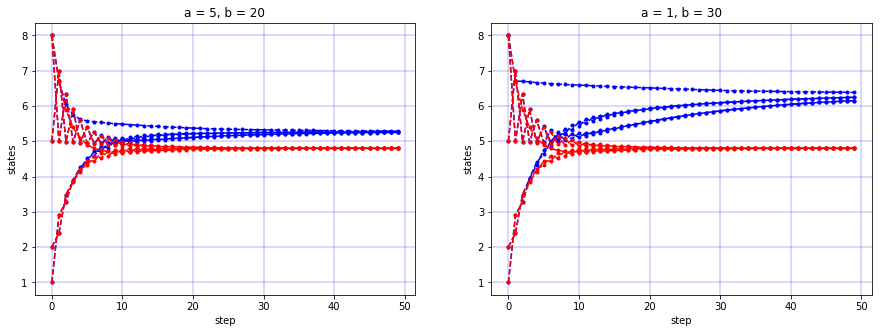

In [63]:
Y1 = AverTraj(W, W1, Q0, K, 50, 5, 20)
Y3 = AverTraj(W, W1, Q0, K, 50, 1, 30)
Y2 = DetTraj(W, Q0, 50)
x = np.arange(50)
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(x, Y1, color = 'blue', marker = ".", linestyle='dashed')
plt.xlabel("step")
plt.ylabel("states")
plt.plot(x, Y2, color = 'red', marker = ".", linestyle='dashed')
plt.xlabel("step")
plt.ylabel("states")
plt.title("a = 5, b = 20")
plt.grid(True, color='blue', linewidth=0.3)

plt.subplot(1, 2, 2)
plt.plot(x, Y3, color = 'blue', marker = ".", linestyle='dashed')
plt.xlabel("step")
plt.ylabel("states")
plt.plot(x, Y2, color = 'red', marker = ".", linestyle='dashed')
plt.xlabel("step")
plt.ylabel("states")
plt.title("a = 1, b = 30")
plt.grid(True, color='blue', linewidth=0.3)

plt.savefig("ComparePlots.png")
plt.show()

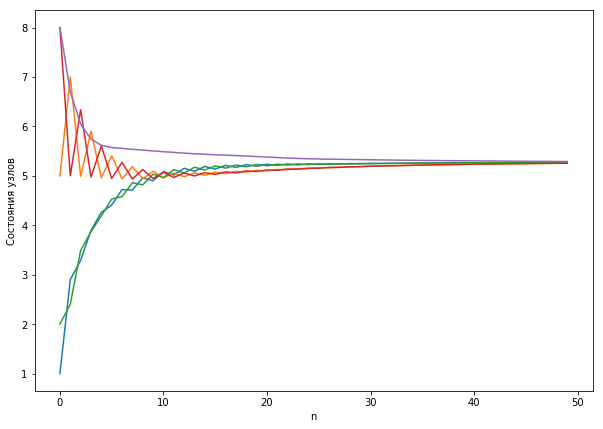

In [8]:
x = np.arange(N)
aY = AverTraj(W, W1, Q0, K, N, 5, 20)
plt.figure(figsize = (10, 7))
plt.plot(x, aY)
plt.xlabel("n")
plt.ylabel("Состояния узлов")
plt.savefig('AverPlot1.png')

In [11]:
print("1)a > b, a:b = 10:1\nТогда C =", NumTraj(W, W1, Q0, K, 100, 10, 1))
print("2)a > b, a:b = 4:1\nТогда C =", NumTraj(W, W1, Q0, K, 100, 4, 1))
print("3)a = b, a:b = 5:5\nТогда C =", NumTraj(W, W1, Q0, K, 100, 5, 5))
print("4)a < b, a:b = 1:4\nТогда C =", NumTraj(W, W1, Q0, K, 100, 1, 4))
print("5)a < b, a:b = 1:10\nТогда C =", NumTraj(W, W1, Q0, K, 100, 1, 10))

1)a > b, a:b = 10:1
Тогда C = 4.843481115145844
2)a > b, a:b = 4:1
Тогда C = 4.923333102368271
3)a = b, a:b = 5:5
Тогда C = 5.029146053099743
4)a < b, a:b = 1:4
Тогда C = 5.513251401049304
5)a < b, a:b = 1:10
Тогда C = 5.899466219147902


In [66]:
G = []
for i in range(1, 100):
    print("шаг №", i)
    a = i
    b = 100 - i
    if(a >= b):
        N = a * 10
    if(b > a):
        N = b * 10
    G.append(NumTraj(W, W1, Q0, K, N, a, b))
print(G)

шаг № 1
шаг № 2
шаг № 3
шаг № 4
шаг № 5
шаг № 6
шаг № 7
шаг № 8
шаг № 9
шаг № 10
шаг № 11
шаг № 12
шаг № 13
шаг № 14
шаг № 15
шаг № 16
шаг № 17
шаг № 18
шаг № 19
шаг № 20
шаг № 21
шаг № 22
шаг № 23
шаг № 24
шаг № 25
шаг № 26
шаг № 27
шаг № 28
шаг № 29
шаг № 30
шаг № 31
шаг № 32
шаг № 33
шаг № 34
шаг № 35
шаг № 36
шаг № 37
шаг № 38
шаг № 39
шаг № 40
шаг № 41
шаг № 42
шаг № 43
шаг № 44
шаг № 45
шаг № 46
шаг № 47
шаг № 48
шаг № 49
шаг № 50
шаг № 51
шаг № 52
шаг № 53
шаг № 54
шаг № 55
шаг № 56
шаг № 57
шаг № 58
шаг № 59
шаг № 60
шаг № 61
шаг № 62
шаг № 63
шаг № 64
шаг № 65
шаг № 66
шаг № 67
шаг № 68
шаг № 69
шаг № 70
шаг № 71
шаг № 72
шаг № 73
шаг № 74
шаг № 75
шаг № 76
шаг № 77
шаг № 78
шаг № 79
шаг № 80
шаг № 81
шаг № 82
шаг № 83
шаг № 84
шаг № 85
шаг № 86
шаг № 87
шаг № 88
шаг № 89
шаг № 90
шаг № 91
шаг № 92
шаг № 93
шаг № 94
шаг № 95
шаг № 96
шаг № 97
шаг № 98
шаг № 99
[6.600142841812184, 6.187555377855402, 5.89753193884823, 5.696481335094818, 5.524720210263462, 5.389588340433881, 5.30

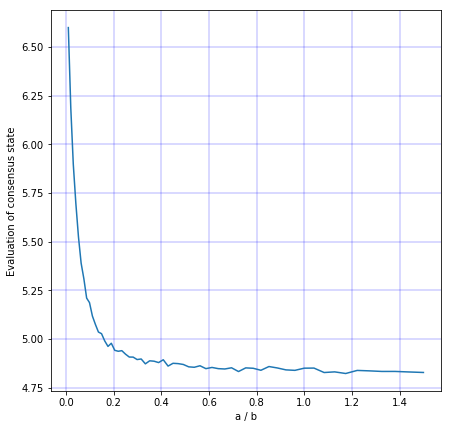

In [73]:
x1 = []
for i in range(1, 61):
    x1.append(i/(100 - i))
G1 = []
for i in range(60):
    G1.append(G[i])
plt.figure(figsize = (7, 7))
plt.xlabel('a / b')
plt.ylabel('Evaluation of consensus state')
plt.plot(x1, G1)
plt.grid(color = "blue", linewidth=0.3)
plt.savefig('2.png')